# Visualization of High-Dimensional Data -- Breast Cancer Dataset

We only can visualize in three dimensions or less. We explore a few algorithms that will help us visualize high dimensional data in this notebook. We will use the Breast Cancer (diagnostic) dataset which contains 569 instances with 30 numeric features. Please read the description below for further information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)

numpy version:  1.17.4
pandas version:  0.25.3


### Initial Exploration of the Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
#organizing features into a dataframe

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target #malignant is coded as '0' and benign as '1'
malignant = (y == 0)
benign = (y == 1)
X.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [4]:
#sanity check

X.shape

(569, 30)

### Principal Component Analysis (PCA)
The idea is to take the first two principal components and then do a scatter plot.

In [5]:
#we will first scale the data and apply PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)

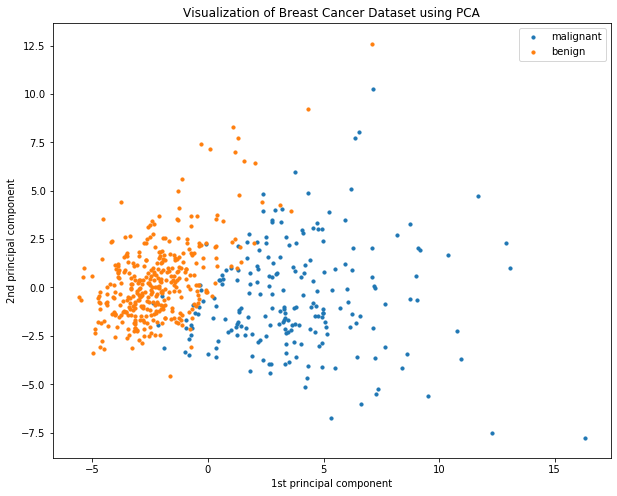

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca2[malignant, 0], X_pca2[malignant, 1], label='malignant', s=10)
plt.scatter(X_pca2[benign, 0], X_pca2[benign, 1], label='benign', s=10)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Visualization of Breast Cancer Dataset using PCA')
plt.legend()
plt.show()

### Non-negative Matrix Factorization (NMF)
Since the features are all non-negative, we might as well try NMF.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

X_mms = MinMaxScaler().fit_transform(X)
X_nmf = NMF(n_components=2, random_state=2019).fit_transform(X_mms)

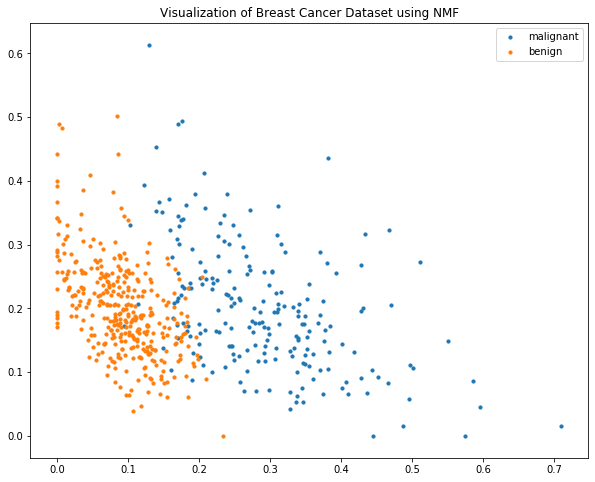

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X_nmf[malignant, 0], X_nmf[malignant, 1], label='malignant', s=10)
plt.scatter(X_nmf[benign, 0], X_nmf[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using NMF')
plt.legend()
plt.show()

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=2019, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.037910
[t-SNE] KL divergence after 1000 iterations: 1.032119


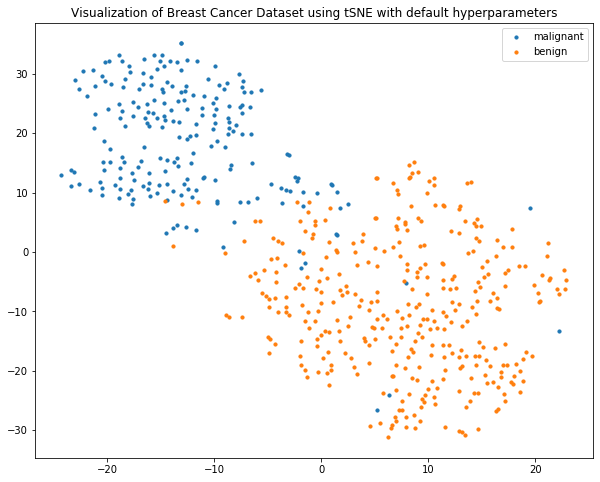

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[malignant, 0], X_tsne[malignant, 1], label='malignant', s=10)
plt.scatter(X_tsne[benign, 0], X_tsne[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using tSNE with default hyperparameters')
plt.legend()
plt.show()

In [11]:
tsne = TSNE(n_components=2, random_state=2019, perplexity=15, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.004s...
[t-SNE] Computed neighbors for 569 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.189675
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.303696
[t-SNE] KL divergence after 1000 iterations: 1.110037


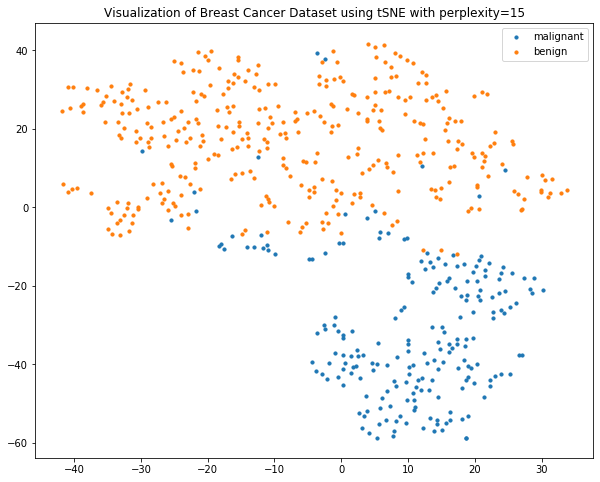

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[malignant, 0], X_tsne[malignant, 1], label='malignant', s=10)
plt.scatter(X_tsne[benign, 0], X_tsne[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using tSNE with perplexity=15')
plt.legend()
plt.show()

### Uniform Manifold Approximation and Projection (UMAP)

In [13]:
#getting some silly warnings about parallel processing
import warnings
warnings.filterwarnings('ignore')

from umap import UMAP
X_umap = UMAP().fit_transform(X_scaled)

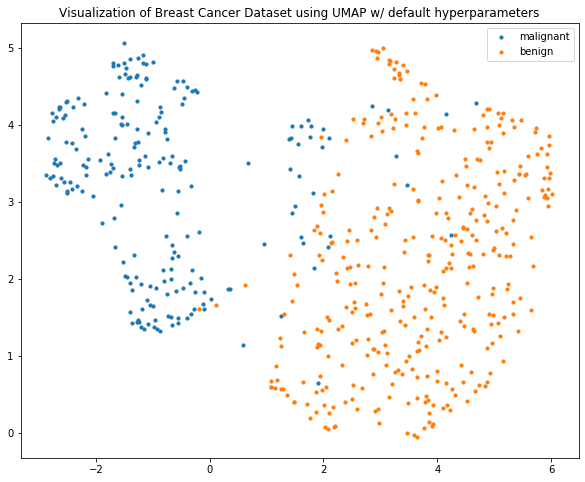

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[malignant, 0], X_umap[malignant, 1], label='malignant', s=10)
plt.scatter(X_umap[benign, 0], X_umap[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using UMAP w/ default hyperparameters')
plt.legend()
plt.show()

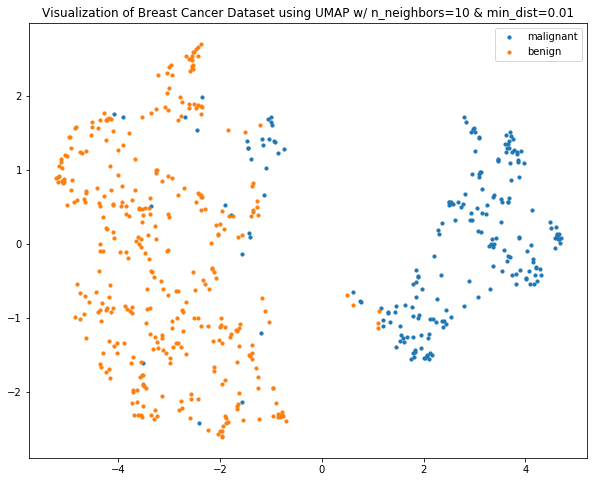

In [15]:
X_umap = UMAP(n_neighbors=10, min_dist=0.01).fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[malignant, 0], X_umap[malignant, 1], label='malignant', s=10)
plt.scatter(X_umap[benign, 0], X_umap[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using UMAP w/ n_neighbors=10 & min_dist=0.01')
plt.legend()
plt.show()

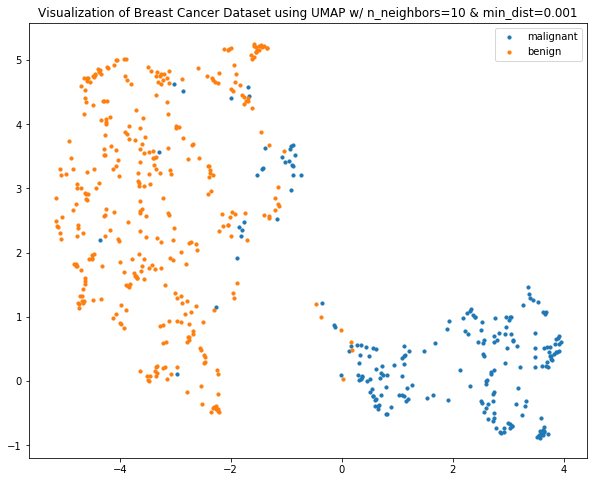

In [16]:
X_umap = UMAP(n_neighbors=10, min_dist=0.001).fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[malignant, 0], X_umap[malignant, 1], label='malignant', s=10)
plt.scatter(X_umap[benign, 0], X_umap[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using UMAP w/ n_neighbors=10 & min_dist=0.001')
plt.legend()
plt.show()

### Isomap Embedding

In [17]:
from sklearn.manifold import Isomap

X_iso = Isomap(n_components=2).fit_transform(X_scaled)

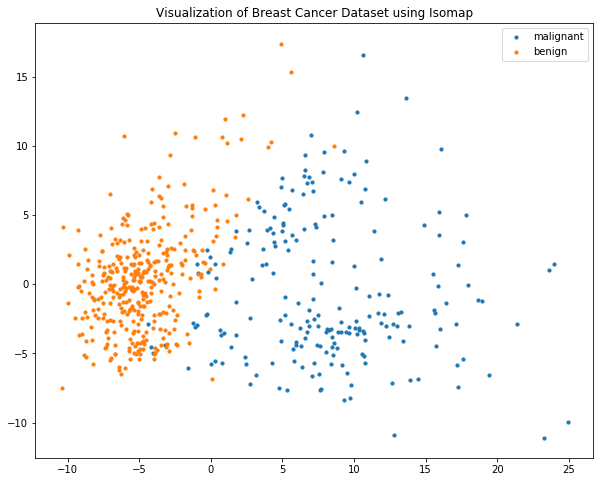

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X_iso[malignant, 0], X_iso[malignant, 1], label='malignant', s=10)
plt.scatter(X_iso[benign, 0], X_iso[benign, 1], label='benign', s=10)
plt.title('Visualization of Breast Cancer Dataset using Isomap')
plt.legend()
plt.show()